# Brain Tumor MRI Classification using CNN

In [1]:
# importing required packages

import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import cv2
import numpy as np


In [2]:
os.listdir()

['Image classification.ipynb', 'venv']

In [3]:
train_path = "C:/Users/Ajay/Chatbot/Training"
test_path = "C:/Users/Ajay/Chatbot/Testing"


print("Train path exists: ", os.path.exists(train_path))
print("Test path exists: ", os.path.exists(test_path))

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
label_map = {label: i for i, label in enumerate(labels)}

train_images = []
train_labels = []
test_images = [] 
test_labels = []

#creating image size
image_size = 200

# adding images and labels to the list
for label in labels:
    path = os.path.join(train_path, label)
    if not os.path.exists(path):
        print(f"path {path} does not exists.")
        continue
    else:
        for img in tqdm(os.listdir(path)):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (image_size, image_size))
            test_images.append(img_array)
            test_labels.append(label)

for label in labels:
    path = os.path.join(test_path, label)
    if not os.path.exists(path):
        print(f"path {path} does not exists")
        continue
    else:
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (image_size, image_size))
            train_images.append(img_array)
            train_labels.append(label)

# converting them to nparray
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# normalizing the image 

train_images = train_images/255.0
test_images = test_images/255.0

# encoding the test_labeles

encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.fit_transform(test_labels)

Train path exists:  True
Test path exists:  True


100%|██████████| 556/556 [00:00<00:00, 676.10it/s]


path C:/Users/Ajay/Chatbot/Training\notumor does not exists.
path C:/Users/Ajay/Chatbot/Training\pituitary does not exists.


In [4]:
# creating a convelutional neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3 ), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.summary()

c:\Users\Ajay\OneDrive\Documents\VSC_Python\Data Handling\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,761,028 (33.42 MB)

 Trainable params: 8,761,028 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# model compilation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:

history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 931ms/step - accuracy: 0.4920 - loss: 1.1597 - val_accuracy: 0.6803 - val_loss: 0.8045
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7155 - loss: 0.7222 - val_accuracy: 0.5365 - val_loss: 0.9317
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 970ms/step - accuracy: 0.7719 - loss: 0.5440 - val_accuracy: 0.7443 - val_loss: 0.6258
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8284 - loss: 0.4260 - val_accuracy: 0.7517 - val_loss: 0.6259
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8391 - loss: 0.3859 - val_accuracy: 0.7485 - val_loss: 0.6958
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8902 - loss: 0.2877 - val_accuracy: 0.8061 - val_loss: 0.5001
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8986 - loss: 0.2593 - val_accuracy: 0.8199 - val_loss: 0.4991
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9161 - loss: 0.2052 - val_accuracy: 0.7698 - val

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step
roc socre: 1.0


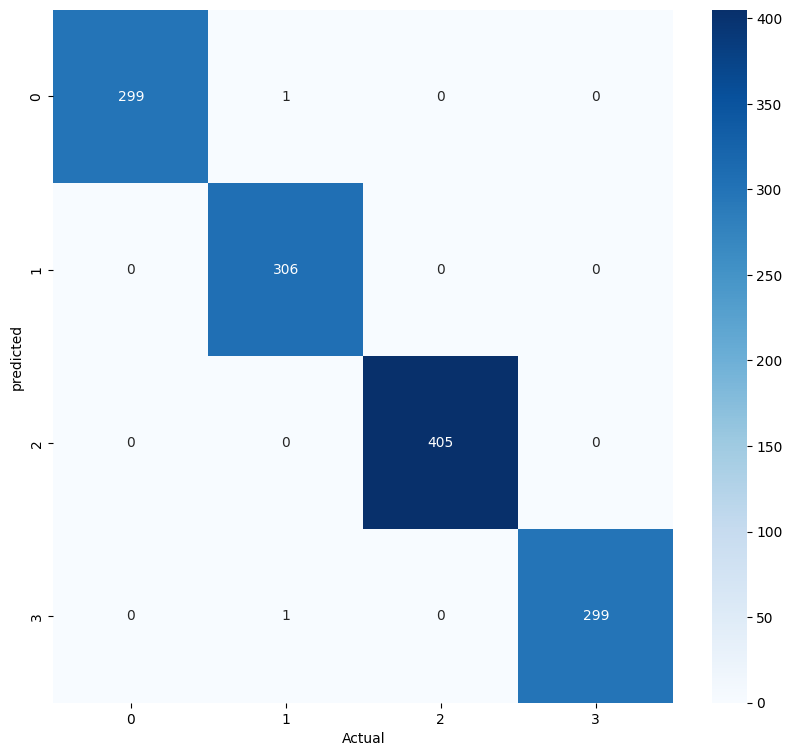

              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       300
  meningioma       0.99      1.00      1.00       306
     notumor       1.00      1.00      1.00       405
   pituitary       1.00      1.00      1.00       300

    accuracy                           1.00      1311
   macro avg       1.00      1.00      1.00      1311
weighted avg       1.00      1.00      1.00      1311



In [7]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

prediction_class = np.argmax(model.predict(train_images), axis=1)
prediction_probablities = model.predict(train_images)

test_case_onehot = to_categorical(train_labels, num_classes=len(labels))

roc_score = roc_auc_score(test_case_onehot, prediction_probablities, multi_class='ovr')
print(f"roc socre: {roc_score}")

conf_matrix = confusion_matrix(train_labels, prediction_class)
plt.figure(figsize=(10, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Actual')
plt.ylabel("predicted")
plt.show()

print(classification_report(train_labels, prediction_class, target_names=labels))

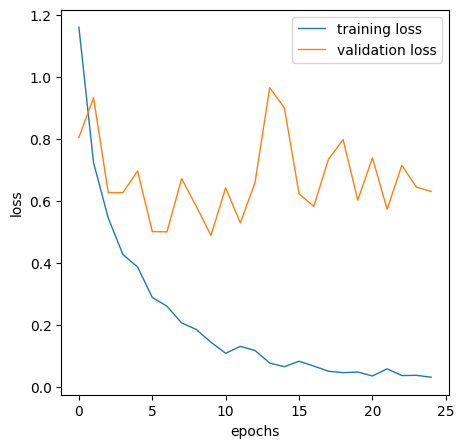

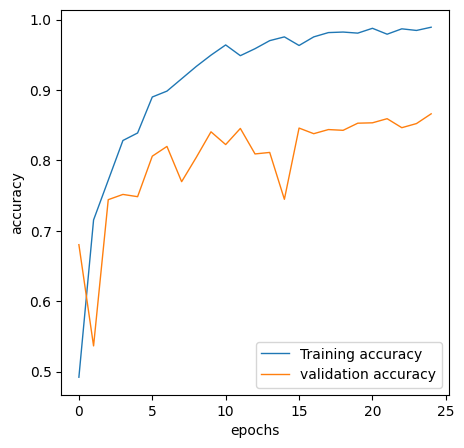

In [8]:
# displaying the actual and predicted values 

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], linewidth=1)
plt.plot(history.history['val_loss'], linewidth=1)
plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], linewidth=1)
plt.plot(history.history['val_accuracy'], linewidth=1)
plt.legend(['Training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The predicted class for the new image is: meningioma


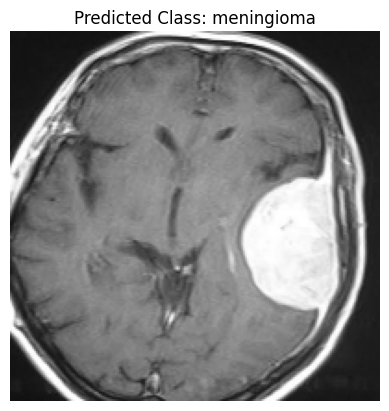

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Görselin yüklenmesi ve ön işleme
def load_and_preprocess_image(image_path):
    image_size = 200
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if img_array is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the file path.")
    
    img_array = cv2.resize(img_array, (image_size, image_size))
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_class(image_path, model, label_map):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_label = list(label_map.keys())[list(label_map.values()).index(predicted_class_index)]
    return predicted_class_label, img_array

image_path = "C:/Users/Ajay/Chatbot/Testing/meningioma/Te-me_0012.jpg"

if os.path.exists(image_path):
    try:
        predicted_class_label, processed_image = predict_image_class(image_path, model, label_map)
        print(f"The predicted class for the new image is: {predicted_class_label}")
        
        processed_image = (processed_image[0] * 255).astype(np.uint8)  # Veri tipini uint8 olarak değiştirme
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted Class: {predicted_class_label}")
        plt.axis('off')  # Eksenleri kapatma
        plt.show()
    except ValueError as e:
        print(e)
else:
    print(f"The file does not exist at: {image_path}")

In [10]:
# saving the model

model.save("model.h5")